For this project, we are going to use the transactional dataset published at UCI repository, which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

Link: https://archive.ics.uci.edu/dataset/352/online+retail

In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Online Retail.xlsx', index_col=False, engine='openpyxl')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df['StockCode'] = df['StockCode'].astype('category')
df['Quantity'] = df['Quantity'].astype('int')
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%d-%m-%Y %H:%M')
df['CustomerID'] = df['CustomerID'].astype('category')
df['Country'] = df['Country'].astype('category')

In [6]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853


Apparently, there remains a few negative Quantity & UnitPrice rows in the dataset. Let's remove that.

In [8]:
df = df.loc[(df['Quantity'] > 0) | (df['UnitPrice'] > 0)]

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,540573.0,9.958705,-80995.0,1.0,3.0,10.0,80995.0,216.229554
InvoiceDate,540573,2011-07-04 14:42:49.112220416,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-20 11:07:00,2011-10-19 11:41:00,2011-12-09 12:50:00,NaN
UnitPrice,540573.0,4.62251,-11062.06,1.25,2.08,4.13,38970.0,96.879076


In [10]:
df['CustomerID'].nunique()

4372

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133744
Country             0
dtype: int64

Unfortunately, the CustomerID column contains over 24% NaN values, and we will have to drop them to conduct the analysis further.

In [12]:
df.dropna(subset=['CustomerID'], inplace=True)

<ipython-input-12-fd077f22c511>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['CustomerID'], inplace=True)


In [13]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


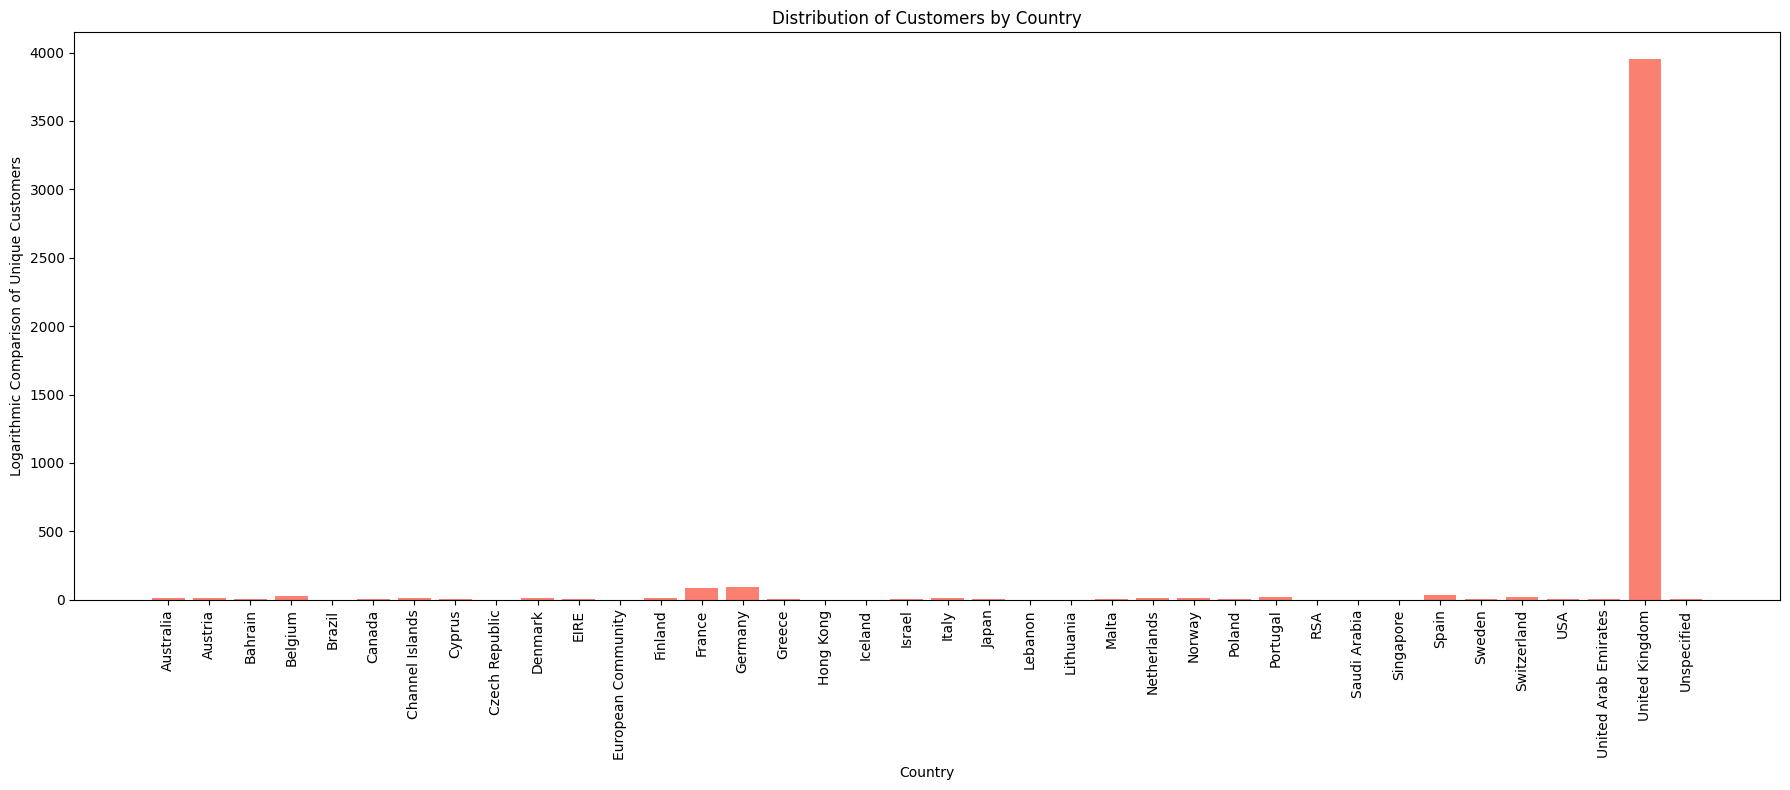

In [14]:
# Group the DataFrame by 'Country' and count the number of unique CustomerIDs in each country
country_counts = df.groupby('Country')['CustomerID'].nunique()

# Create the bar chart
plt.figure(figsize=(18, 8))
plt.bar(country_counts.index, country_counts.values, color='salmon')
plt.xlabel('Country')
plt.ylabel('Logarithmic Comparison of Unique Customers')
plt.title('Distribution of Customers by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The above bar chart shows that most of the transactions occur in the United Kingdom. However, the sparsity is pretty massive. This use-case calls for a logarithmic scale adjustment. Let's do that.

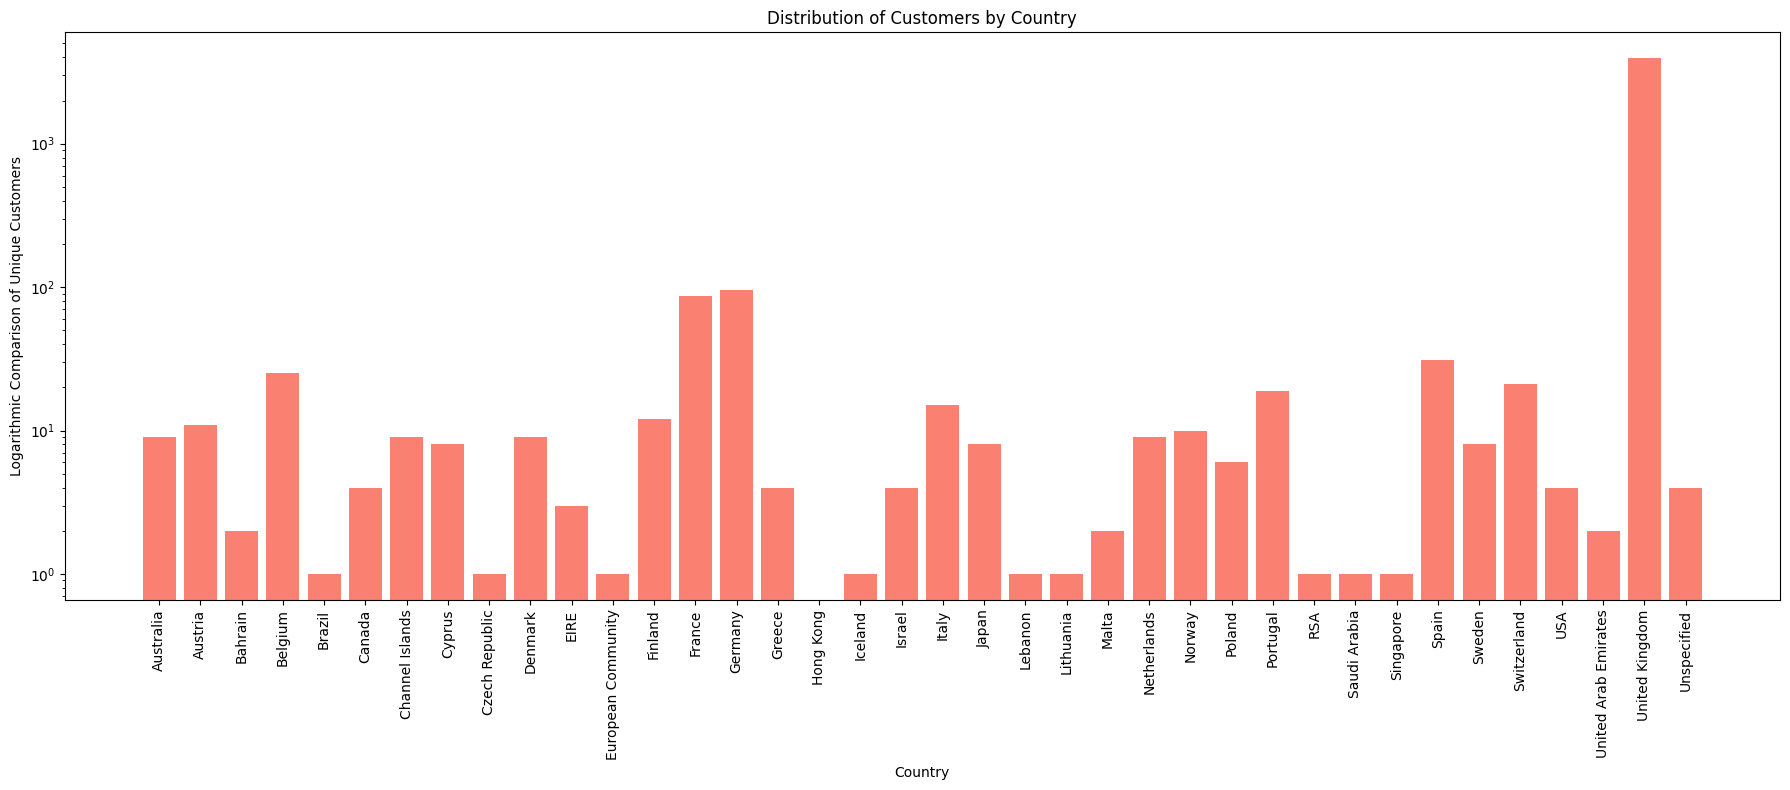

In [15]:
# Group the DataFrame by 'Country' and count the number of unique CustomerIDs in each country
country_counts = df.groupby('Country')['CustomerID'].nunique()

# Create the bar chart with logarithmic scale
plt.figure(figsize=(18, 8))
plt.bar(country_counts.index, country_counts.values, color='salmon')
plt.xlabel('Country')
plt.ylabel('Logarithmic Comparison of Unique Customers')
plt.title('Distribution of Customers by Country')
plt.xticks(rotation=90)
plt.yscale('log')
plt.tight_layout()
plt.show()

Now, this one looks pretty interesting and clearer!



# Retention Analysis / Churn Rate Analysis

Let's try the cohort analysis measure the user engagement and retention over the time span of this dataset.

In [16]:
# invoice month
get_month = lambda x: x.month
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

<ipython-input-16-693c1efbe60a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)


In [17]:
# getting the first purchase month for each client

df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

<ipython-input-17-4373eafd3b03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')


In [18]:
# getting the cohort analysis index
# Number of months passed by since this Customer made their very first purchase

df['CohortIndex'] = df['InvoiceMonth'] - df['CohortMonth'] + 1

<ipython-input-18-67a66dc5e6ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortIndex'] = df['InvoiceMonth'] - df['CohortMonth'] + 1


In [19]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,8,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,8,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,8,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,8,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,12,8,5


In [20]:
# getting the number of buyer belonging to each cohort each month

cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
retention_table = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
retention = retention_table.divide(retention_table.iloc[:, 0], axis=0)
retention = retention.round(3) * 100

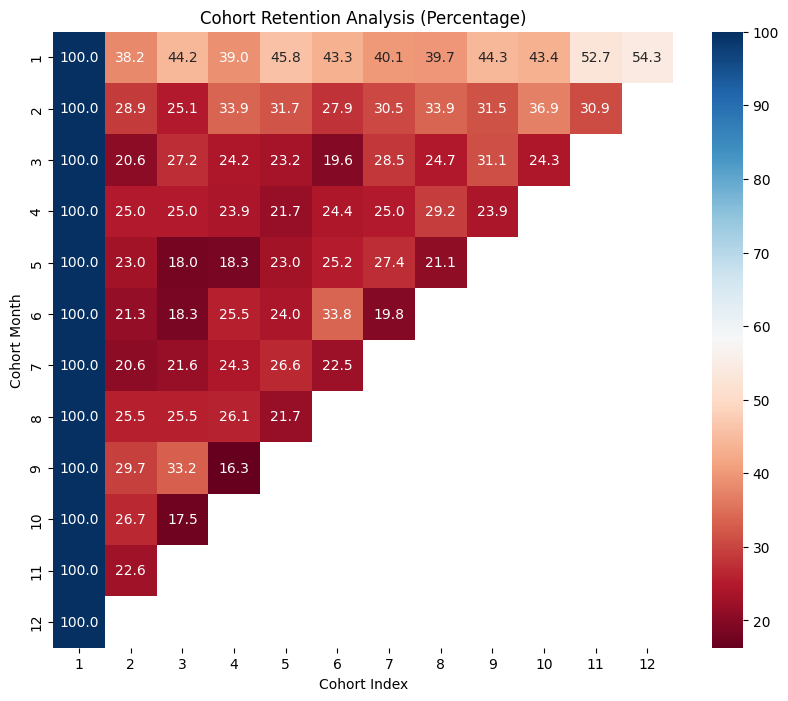

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(retention, annot=True, fmt='.1f', cmap='RdBu', ax=ax)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.title('Cohort Retention Analysis (Percentage)')
plt.show()

From the above heatmap, it's evident that there is a sudden drop in retention on the second month although it starts increasing in the later months for all cohorts.

In this context, the retention rate of the first cohort month (December 2010) is the highest, which marks a comparatively higher peak year. Therefore, churn rate is comparatively lower for the cohort in December 2010.

In [22]:
def quarter_profit_loss(df, col_name):
  list_prod = df[col_name]
  quarter_list = []
  for i in list_prod:
    if i <= 3:
      quarter_list.append('Q1')
    elif i >= 4 and i <= 6:
      quarter_list.append('Q2')
    elif i >= 7 and i <= 9:
      quarter_list.append('Q3')
    elif i >= 10 and i <= 12:
      quarter_list.append('Q4')
    else:
      quarter_list.append('0')

  df['Quarter'] = quarter_list
  return quarter_list # Return the created quarter list

# creating a quarter column
qtr = quarter_profit_loss(df, 'InvoiceMonth')
df['Quarter'] = qtr

<ipython-input-22-b62b833de9f2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarter'] = quarter_list
<ipython-input-22-b62b833de9f2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarter'] = qtr


In [23]:
# Convert 'Quantity' and 'UnitPrice' to numeric, handling potential errors
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# convert 'CustomerID' to integer
df['CustomerID'] = df['CustomerID'].astype(int)

# Calculate 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

<ipython-input-23-a67ce82adf14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
<ipython-input-23-a67ce82adf14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
<ipython-input-23-a67ce82adf14>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [24]:
# now converting CustomerID to category

df['CustomerID'] = df['CustomerID'].astype('category')

<ipython-input-24-9b2230703af2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype('category')


In [25]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,Quarter,TotalPrice
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,12,8,5,Q4,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12,8,5,Q4,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,12,8,5,Q4,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,12,8,5,Q4,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,12,8,5,Q4,14.85


In [26]:
# reorder the table

df = df[['InvoiceNo', 'CustomerID', 'Country',
         'StockCode', 'Description', 'Quantity',
         'UnitPrice', 'TotalPrice', 'InvoiceDate', 'Quarter',
         'CohortMonth', 'InvoiceMonth', 'CohortIndex']]

In [27]:
df.head(5)

,InvoiceNo,CustomerID,Country,StockCode,Description,Quantity,UnitPrice,TotalPrice,InvoiceDate,Quarter,CohortMonth,InvoiceMonth,CohortIndex
0,536365,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,Q4,2,12,11
1,536365,17850,United Kingdom,71053,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,Q4,2,12,11
2,536365,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,Q4,2,12,11
3,536365,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,Q4,2,12,11
4,536365,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,Q4,2,12,11


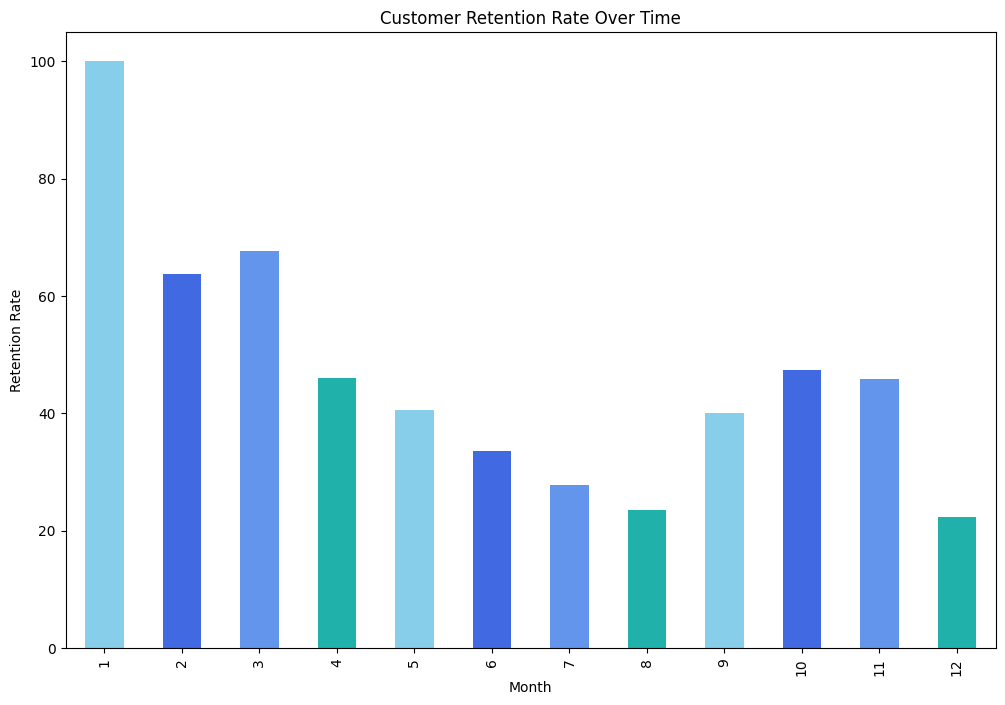

In [47]:
# What is the customer retention rate over different time periods?

# Group the data by month and calculate the number of unique customers
retention_rate = df.groupby(df['CohortMonth'])['CustomerID'].nunique()
retention_rate = retention_rate.divide(retention_rate.iloc[0], axis=0) * 100

# Create a list of colors for the bars
colors = ['skyblue', 'royalblue', 'cornflowerblue', 'lightseagreen']

# Plot the bar chart
bars = retention_rate.plot(kind='bar', figsize=(12, 8), color=colors)

plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.title('Customer Retention Rate Over Time')
plt.show()

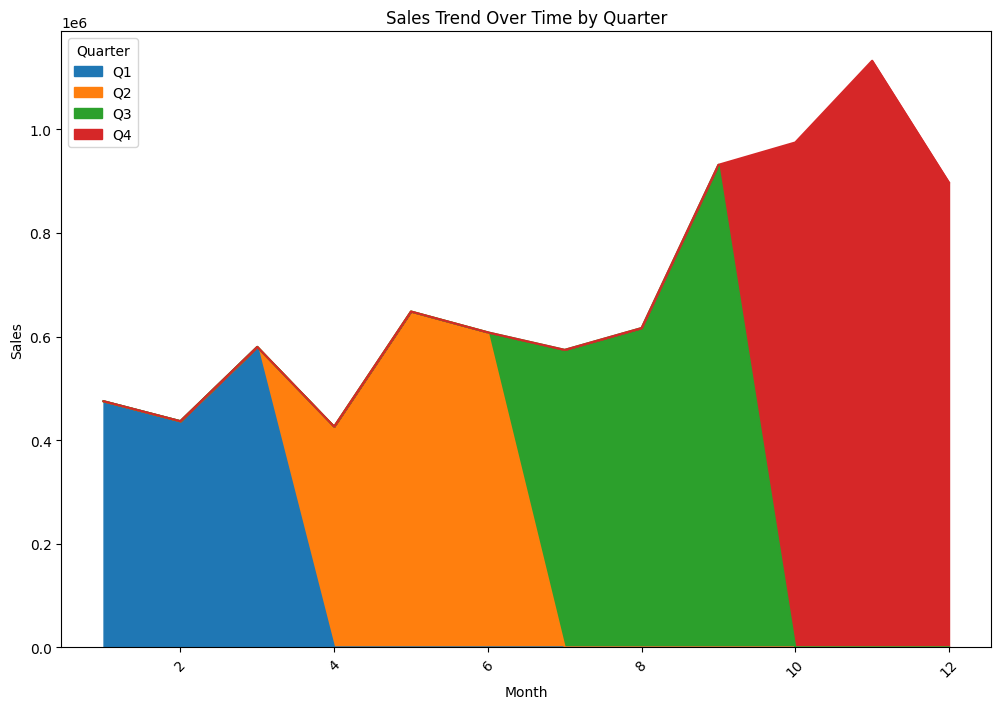

In [28]:
# What is the overall sales trend over time?

sales_trend = df.groupby(['InvoiceMonth', 'Quarter'])['TotalPrice'].sum().reset_index()

# Pivot the data to have 'InvoiceMonth' as the index and 'Quarter' as the columns
pivot_data = sales_trend.pivot(index='InvoiceMonth', columns='Quarter', values='TotalPrice')

# Plotting the stacked area chart
pivot_data.plot(kind='area', figsize=(12, 8), stacked=True)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time by Quarter')
plt.xticks(rotation=45)
plt.legend(title='Quarter')
plt.show()

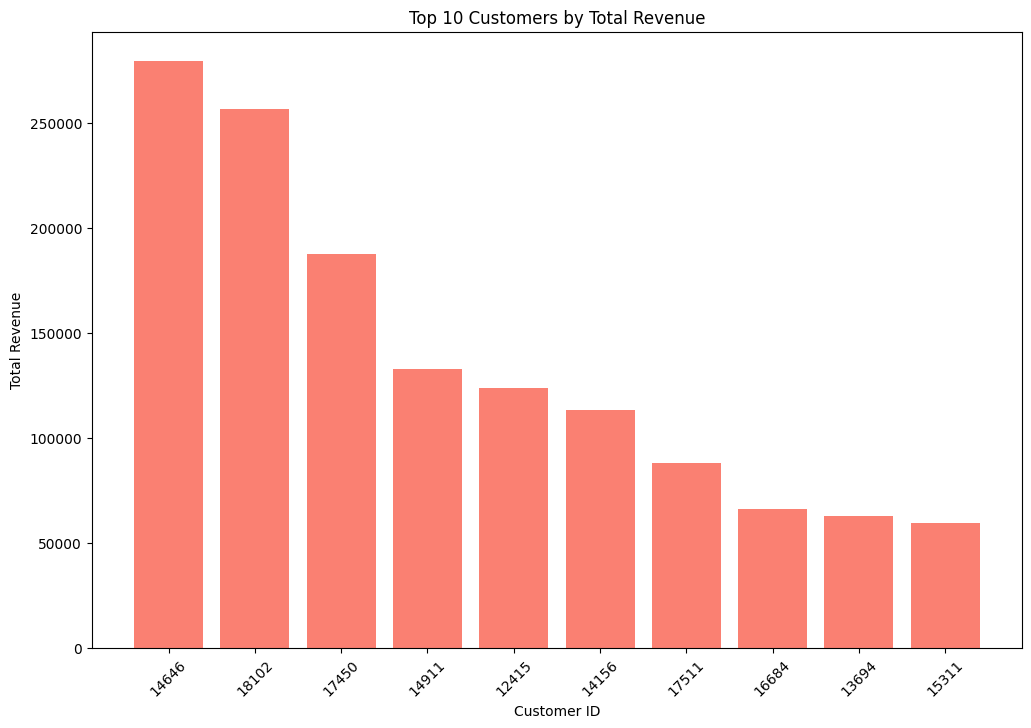

In [29]:
# Who are the top 10 customers by total revenue?

top_customers = df.groupby('CustomerID')['TotalPrice'].sum().nlargest(10).reset_index()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_customers['CustomerID'].astype(str), top_customers['TotalPrice'], color='salmon')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.title('Top 10 Customers by Total Revenue')
plt.xticks(rotation=45)
plt.show()

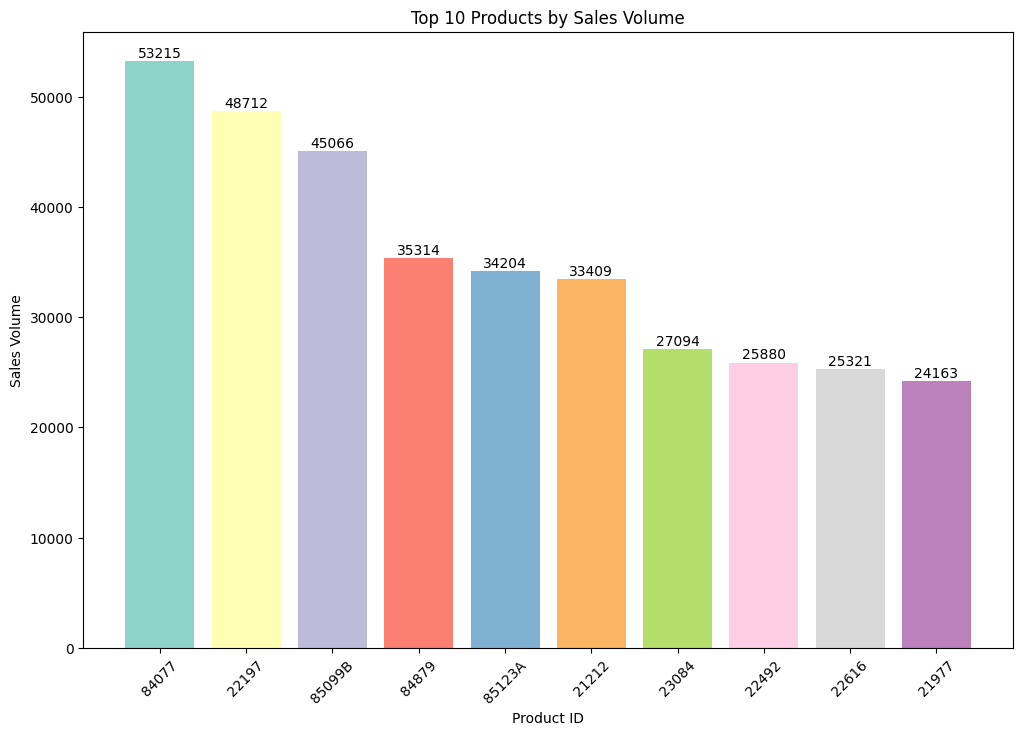

In [54]:
# What are the top 10 products by sales volume?

# Calculate the top 10 products by sales volume
top_products = df.groupby('StockCode')['Quantity'].sum().nlargest(10).reset_index()

# Create a color palette
palette = sns.color_palette('Set3', len(top_products))

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(top_products['StockCode'].astype(str), top_products['Quantity'], color=palette)
plt.xlabel('Product ID')
plt.ylabel('Sales Volume')
plt.title('Top 10 Products by Sales Volume')
plt.xticks(rotation=45)

# Adding text labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 50, int(yval),
             ha='center', va='bottom')

plt.show()


In [35]:
# How frequently do customers make purchases (purchase frequency)?

purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().mean()
print(f"Average Purchase Frequency: {purchase_frequency:.2f}")


Average Purchase Frequency: 5.08


In [30]:
# What are the average order values per customer?

df['TotalPrice'].mean()

20.401853884555923

Text(0.5, 1.0, 'Distribution of Order Values')

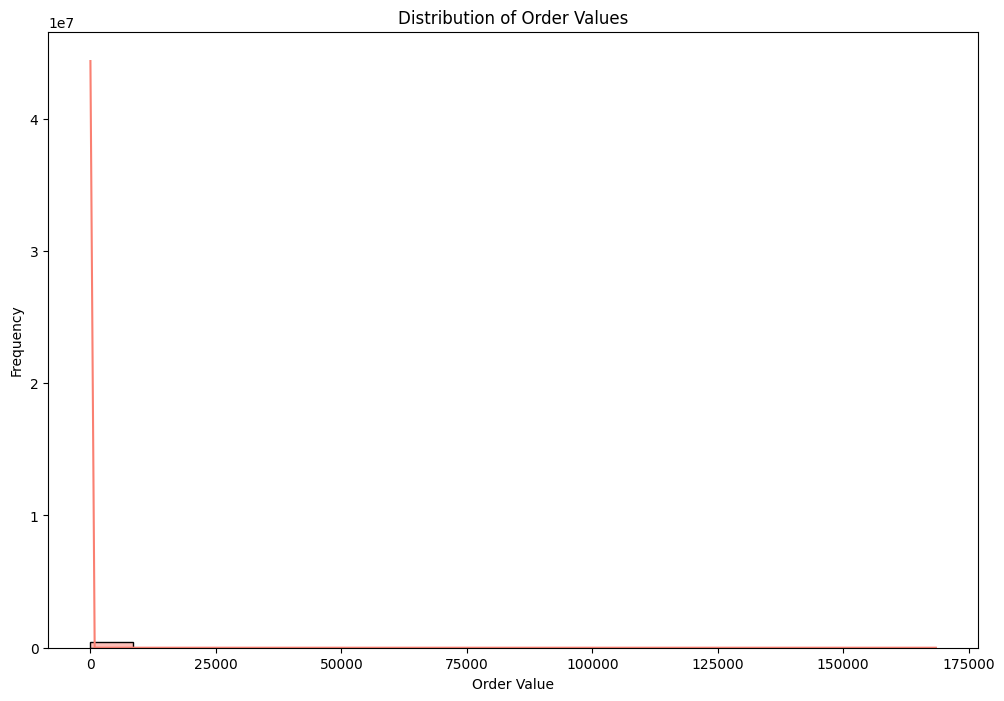

In [31]:
# What is the distribution of order values greater than 0?

order_values = df[df['TotalPrice'] > 0]
plt.figure(figsize=(12, 8))
sns.histplot(order_values['TotalPrice'], bins=20, kde=True, color='salmon')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.title('Distribution of Order Values')

It looks like the data for order values is highly skewed, with a large concentration of values near the lower end. To better visualize the distribution, we can try the following approaches:



*   **Log Transformation:** Apply a log transformation to the order values to reduce skewness.
*   **Adjust Bins:** Adjust the number of bins in the histogram to better capture the distribution.
*   **Remove Outliers:** Remove extreme outliers that may be affecting the distribution.



### Log transformation

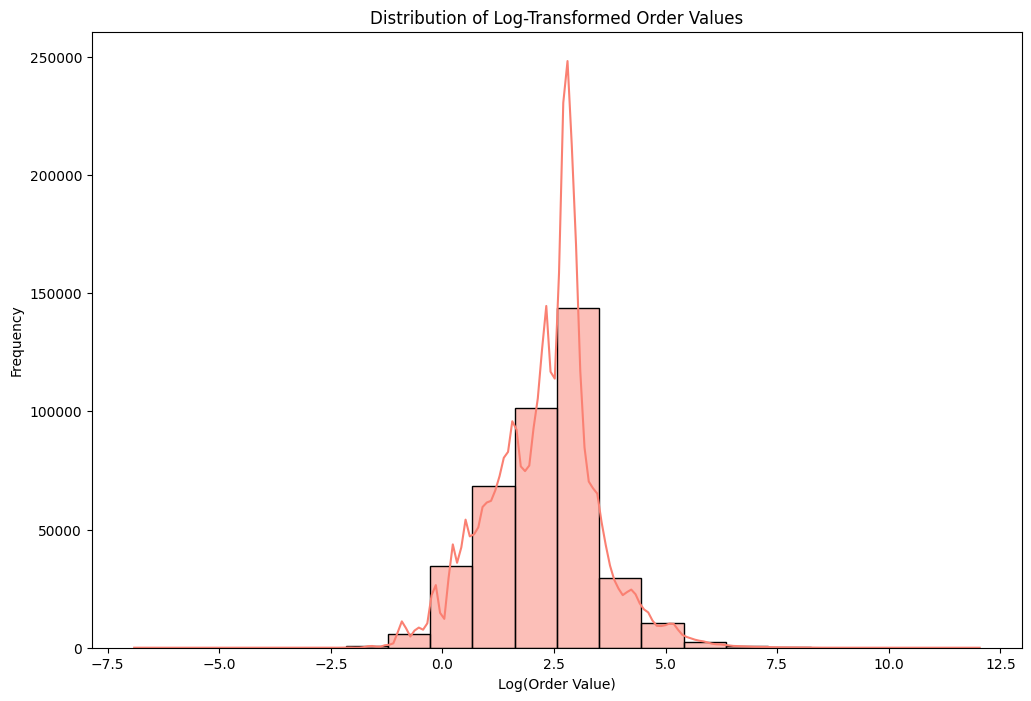

In [32]:
# Filter out order values greater than 1
order_values = df[df['TotalPrice'] > 0]

# Apply log transformation
log_order_values = np.log(order_values['TotalPrice'])

plt.figure(figsize=(12, 8))
sns.histplot(log_order_values, bins=20, kde=True, color='salmon')
plt.xlabel('Log(Order Value)')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Order Values')
plt.show()


While this chart looks beautiful, logarithmic order value does not really help much if it does not provide a clear insight.

### Adjust bins

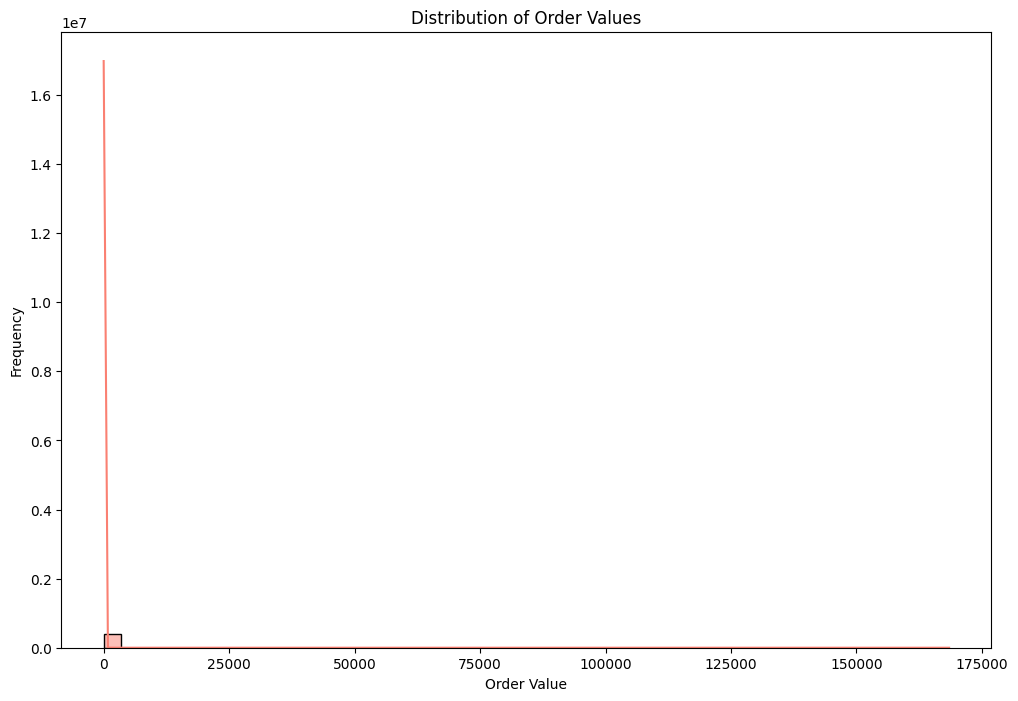

In [33]:
# Filter out order values greater than 1
order_values = df[df['TotalPrice'] > 1]
plt.figure(figsize=(12, 8))
sns.histplot(order_values['TotalPrice'], bins=50, kde=True, color='salmon')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.title('Distribution of Order Values')
plt.show()


Clearly, it did not help much. And observing the skewness, I felt that removing outliers would be a good approach here.

### Removing outliers

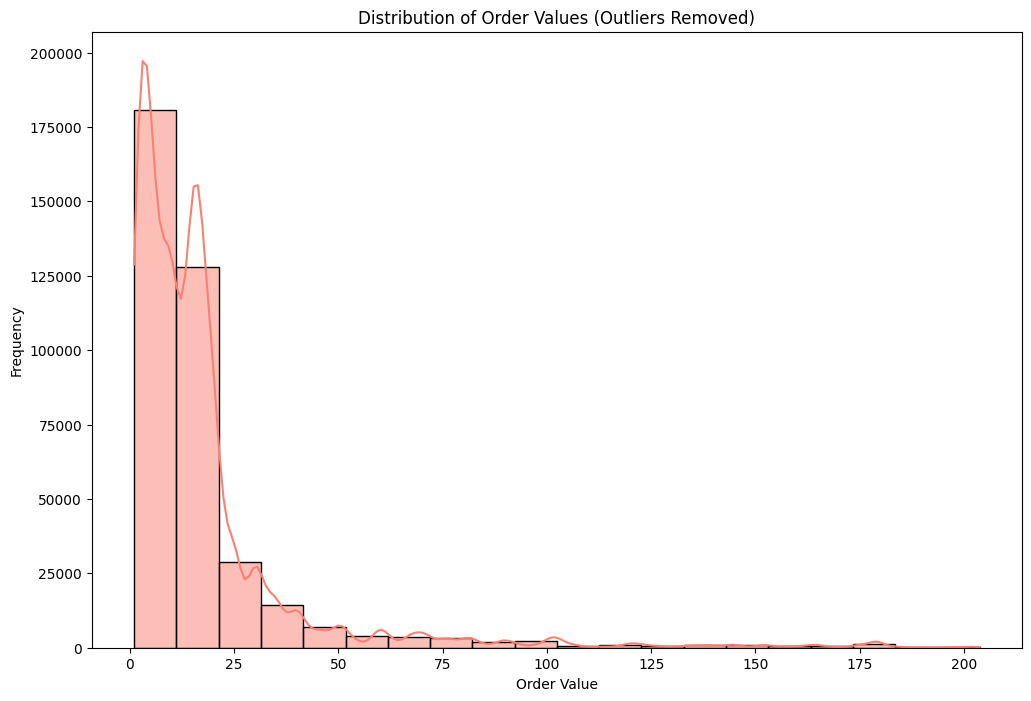

In [34]:
# Define a threshold for outliers
threshold = order_values['TotalPrice'].quantile(0.99)

# Filter out the outliers
filtered_order_values = order_values[order_values['TotalPrice'] < threshold]
plt.figure(figsize=(12, 8))
sns.histplot(filtered_order_values['TotalPrice'], bins=20, kde=True, color='salmon')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.title('Distribution of Order Values (Outliers Removed)')
plt.show()

This chart now shows a better and clearer insights on the order values. The graph appears to show a right-skewed distribution. This means that there are more orders with lower values than there are orders with higher values. The  shape of the distribution suggests that most orders fall within a certain price range, with a smaller number of orders  being much more expensive or much less expensive. For example, the graph shows that there are more orders with a value between 75 and 100 than there are orders with a value between 175 and 200.